In [97]:
%load_ext autoreload
%autoreload 2
from ProfileBuilder import Graphlet

from CustomRWKernel import compute_random_walk_kernel

from networkx.drawing.nx_pylab import draw_kamada_kawai, draw_spring
import matplotlib.pyplot as plt
from sklearn import svm, datasets

import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [98]:
graphlet = Graphlet('data/annotated-trace.csv')

In [101]:
X = graphlet.profile_graphlets
y = graphlet.get_graphlets_label()
y =[0 if el=='normal' else 1 for el in y]

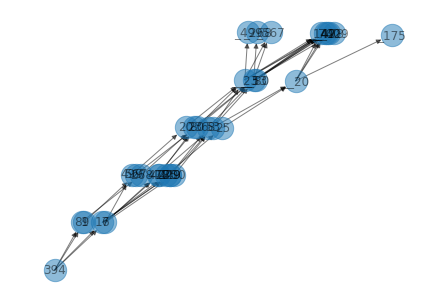

In [106]:
draw_kamada_kawai(X[0], with_labels= True, alpha = 0.5, node_size= 500)

In [102]:
gram_matrix = np.zeros((len(X[:50]), len(X[:50])))
for i in range(len(X[:50])):
    for j in range(len(X[:50])):
        gram_matrix[i][j] = compute_random_walk_kernel(X[i], X[j])
    if i % 4 == 0 : print(i)

0
4
8
12
16
20
24
28
32


KeyboardInterrupt: 

In [ ]:
compute_random_walk_kernel(graphlet.activity_graphlets[0], graphlet.activity_graphlets[1])

In [ ]:
#custom_kernel
clf = svm.SVC(kernel="precomputed")


In [ ]:
clf.fit(gram_matrix, y[:50])

In [ ]:
clf.predict(gram_matrix)

In [ ]:
print(gram_matrix)

In [ ]:
for l in X:
    if 36!=len(l):print(len(l))

In [ ]:
for l

In [2]:
!pip install slycot

     |████████████████████████████████| 1.5MB 2.1MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  ERROR: Command errored out with exit status 1:
   command: /home/sami/anaconda3/bin/python /home/sami/anaconda3/lib/python3.6/site-packages/pip/_vendor/pep517/_in_process.py build_wheel /tmp/tmpu586jnyh
       cwd: /tmp/pip-install-qmtx66eh/slycot
  Complete output (84 lines):
  Not searching for unused variables given on the command line.
  CMake Error: CMake was unable to find a build program corresponding to "Ninja".  CMAKE_MAKE_PROGRAM is not set.  You probably need to select a different build tool.
  -- Configuring incomplete, errors occurred!
  See also "/tmp/pip-install-qmtx66eh/slycot/_cmake_test_compile/build/CMakeFiles/CMakeOutput.log".
  Not searching for unused variables given on the command line.
  -- The C compiler identification is GNU 7.4.0
  -- Check for working C compiler: /usr